<a href="https://colab.research.google.com/github/iagonb/desafio_data_DG/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise Exploratória dos dados


In [114]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
df = pd.read_csv('/content/data.csv')

In [175]:
df.head()

,Instante,Usina,Energia Ativa kWh,Energia Ativa Ponta kWh,Energia Ativa Fora Ponta kWh,Demanda Ativa kW,Demanda Ativa Ponta kW,Demanda Ativa Fora Ponta kW
0,2021-09-01 00:00:00,X,-1.26,0.0,-1.26,-5.04,0.0,-5.04
1,2021-09-01 00:15:00,X,-1.26,0.0,-1.26,-5.04,0.0,-5.04
2,2021-09-01 00:30:00,X,-1.05,0.0,-1.05,-4.20,0.0,-4.20
3,2021-09-01 00:45:00,X,-1.26,0.0,-1.26,-5.04,0.0,-5.04
4,2021-09-01 01:00:00,X,-1.26,0.0,-1.26,-5.04,0.0,-5.04


In [176]:
df.columns

Index(['Instante', 'Usina', 'Energia Ativa kWh', 'Energia Ativa Ponta kWh',
       'Energia Ativa Fora Ponta kWh', 'Demanda Ativa kW',
       'Demanda Ativa Ponta kW', 'Demanda Ativa Fora Ponta kW'],
      dtype='object')

In [177]:
df.shape

(2880, 8)

In [178]:
df.dtypes

Instante                         object
Usina                            object
Energia Ativa kWh               float64
Energia Ativa Ponta kWh         float64
Energia Ativa Fora Ponta kWh    float64
Demanda Ativa kW                float64
Demanda Ativa Ponta kW          float64
Demanda Ativa Fora Ponta kW     float64
dtype: object

In [179]:
df = df.drop(['Usina'], axis=1)

In [180]:
# convert a coluna instante para timestamps
df['Instante'] = pd.to_datetime(df['Instante'])

In [181]:
df.dtypes

Instante                        datetime64[ns]
Energia Ativa kWh                      float64
Energia Ativa Ponta kWh                float64
Energia Ativa Fora Ponta kWh           float64
Demanda Ativa kW                       float64
Demanda Ativa Ponta kW                 float64
Demanda Ativa Fora Ponta kW            float64
dtype: object

In [182]:
df.Instante

0      2021-09-01 00:00:00
1      2021-09-01 00:15:00
2      2021-09-01 00:30:00
3      2021-09-01 00:45:00
4      2021-09-01 01:00:00
               ...        
2875   2021-09-30 22:45:00
2876   2021-09-30 23:00:00
2877   2021-09-30 23:15:00
2878   2021-09-30 23:30:00
2879   2021-09-30 23:45:00
Name: Instante, Length: 2880, dtype: datetime64[ns]

In [183]:
df.loc[534]

Instante                        2021-09-06 13:30:00
Energia Ativa kWh                            257.46
Energia Ativa Ponta kWh                         0.0
Energia Ativa Fora Ponta kWh                 257.46
Demanda Ativa kW                            1029.84
Demanda Ativa Ponta kW                          0.0
Demanda Ativa Fora Ponta kW                 1029.84
Name: 534, dtype: object

In [184]:
df.describe()

,Energia Ativa kWh,Energia Ativa Ponta kWh,Energia Ativa Fora Ponta kWh,Demanda Ativa kW,Demanda Ativa Ponta kW,Demanda Ativa Fora Ponta kW
count,2873.000000,2880.000000,2874.000000,2873.000000,2880.000000,2874.000000
mean,97.928489,0.567875,97.508685,391.713958,2.271500,390.034739
std,115.725234,6.163242,116.083489,462.900934,24.652969,464.333956
min,-1.470000,-1.470000,-1.470000,-5.880000,-5.880000,-5.880000
25%,-1.260000,0.000000,-1.260000,-5.040000,0.000000,-5.040000
50%,-0.630000,0.000000,0.000000,-2.520000,0.000000,0.000000
75%,242.340000,0.000000,242.760000,969.360000,0.000000,971.040000
max,261.240000,110.670000,261.240000,1044.960000,442.680000,1044.960000


In [185]:
for column in df.columns:
    print('{} : {}'.format(column, df[column].isnull().values.any()))

Instante : False
Energia Ativa kWh : True
Energia Ativa Ponta kWh : False
Energia Ativa Fora Ponta kWh : True
Demanda Ativa kW : True
Demanda Ativa Ponta kW : False
Demanda Ativa Fora Ponta kW : True


Vamos retirar todas as linhas do banco de dados com NAN. Caso nosso conjunto de dados restantes sejam insuficientes para a análise, posteriormente, podemos retornar aos dados originais e avaliar se os dados faltantes são passíveis de substituição.

In [186]:
df = df.dropna(how='any')
print(df.shape)

(2869, 7)


In [187]:
df[df['Energia Ativa Ponta kWh'] > 0]

,Instante,Energia Ativa kWh,Energia Ativa Ponta kWh,Energia Ativa Fora Ponta kWh,Demanda Ativa kW,Demanda Ativa Ponta kW,Demanda Ativa Fora Ponta kW
69,2021-09-01 17:15:00,100.17,100.17,0.0,400.68,400.68,0.0
70,2021-09-01 17:30:00,4.83,4.83,0.0,19.32,19.32,0.0
71,2021-09-01 17:45:00,0.84,0.84,0.0,3.36,3.36,0.0
165,2021-09-02 17:15:00,83.16,83.16,0.0,332.64,332.64,0.0
166,2021-09-02 17:30:00,22.26,22.26,0.0,89.04,89.04,0.0
...,...,...,...,...,...,...,...
2758,2021-09-29 17:30:00,11.34,11.34,0.0,45.36,45.36,0.0
2759,2021-09-29 17:45:00,2.52,2.52,0.0,10.08,10.08,0.0
2853,2021-09-30 17:15:00,73.92,73.92,0.0,295.68,295.68,0.0
2854,2021-09-30 17:30:00,30.03,30.03,0.0,120.12,120.12,0.0


In [188]:
df[df['Demanda Ativa Ponta kW'] > 0].head(10)

,Instante,Energia Ativa kWh,Energia Ativa Ponta kWh,Energia Ativa Fora Ponta kWh,Demanda Ativa kW,Demanda Ativa Ponta kW,Demanda Ativa Fora Ponta kW
69,2021-09-01 17:15:00,100.17,100.17,0.0,400.68,400.68,0.0
70,2021-09-01 17:30:00,4.83,4.83,0.0,19.32,19.32,0.0
71,2021-09-01 17:45:00,0.84,0.84,0.0,3.36,3.36,0.0
165,2021-09-02 17:15:00,83.16,83.16,0.0,332.64,332.64,0.0
166,2021-09-02 17:30:00,22.26,22.26,0.0,89.04,89.04,0.0
167,2021-09-02 17:45:00,2.31,2.31,0.0,9.24,9.24,0.0
261,2021-09-03 17:15:00,18.48,18.48,0.0,73.92,73.92,0.0
262,2021-09-03 17:30:00,11.55,11.55,0.0,46.20,46.20,0.0
263,2021-09-03 17:45:00,5.46,5.46,0.0,21.84,21.84,0.0
549,2021-09-06 17:15:00,56.28,56.28,0.0,225.12,225.12,0.0


Os termos de ponta e fora ponta são importantes para caracterizar a demanda e consumo elétrico. 

Para definir e considerar os valores baseados em cada momento de demanda e consumo, foram determinados dois “tipos” diferentes, aos quais chamamos de consumo ponta e fora ponta — ou horário ponta e o horário fora ponta, como também são conhecidos.

*   ponta: É um período de três horas consecutivas, com exceção para os sábados, domingos e feriados, definido pela concessionária local, que se baseia nas características de seu sistema elétrico. Geralmente, esse período acontece entre às 18h e às 21h, horário com maior consumo de energia durante o dia.

*   fora ponta: O horário fora ponta corresponde ao período em que o consumo de energia elétrica é mais baixo, e, por consequência, a capacidade máxima das linhas de transmissão está longe de ser atingida.Acontece, geralmente, em dois intervalos: das 00h às 17h59 e das 21h às 23h59.

Retirado de: https://www.focusenergia.com.br/consumo-ponta-e-fora-ponta-o-que-e/#:~:text=Consumo%20fora%20ponta,e%20das%2021h%20às%2023h59.

Dito isso, e através da analise exploratória dos dados vemos que as colunas chamadas de "Ativas" representam a soma dos valores de "Ponta" e "Fora Ponta".

In [189]:
import seaborn as sns
sns.set()

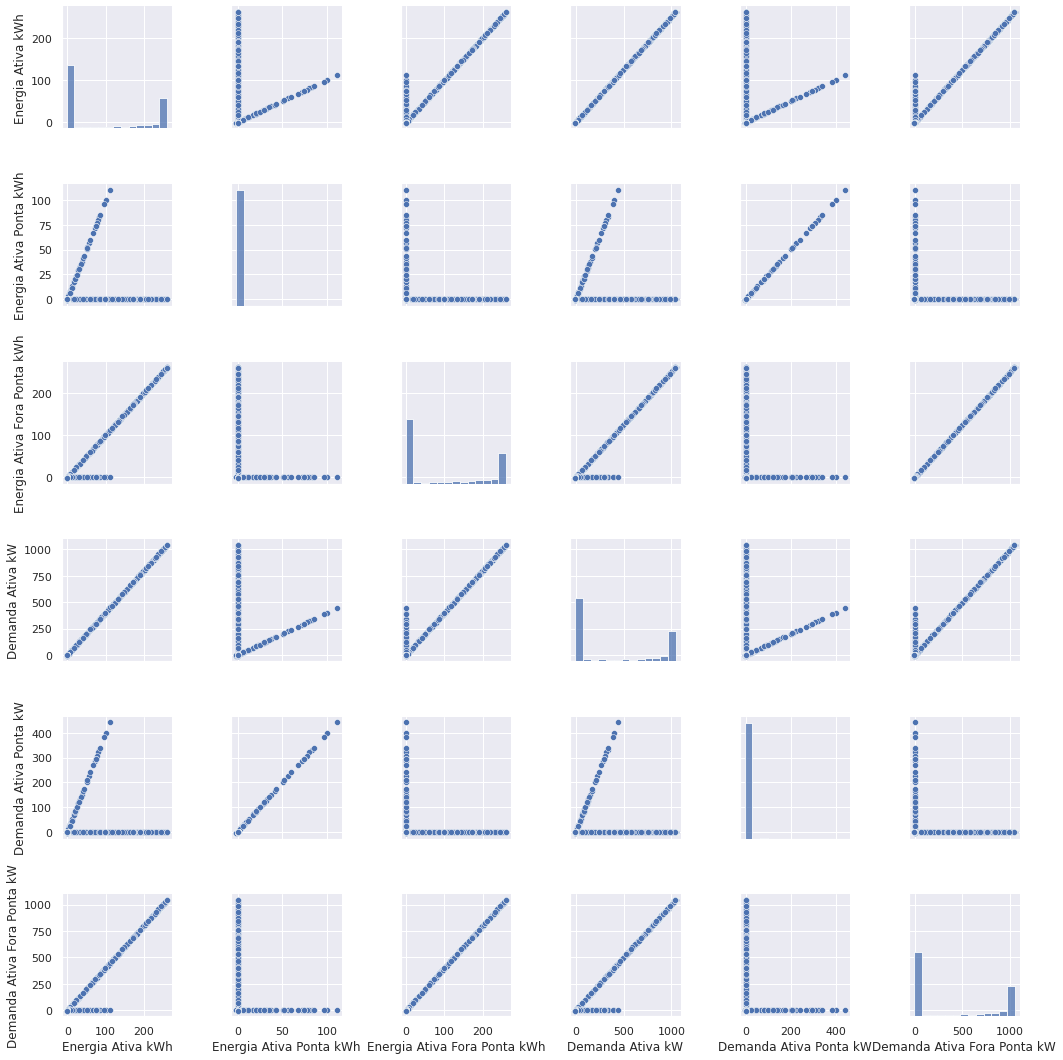

In [131]:
sns.pairplot(df.drop(['Instante'], axis=1))

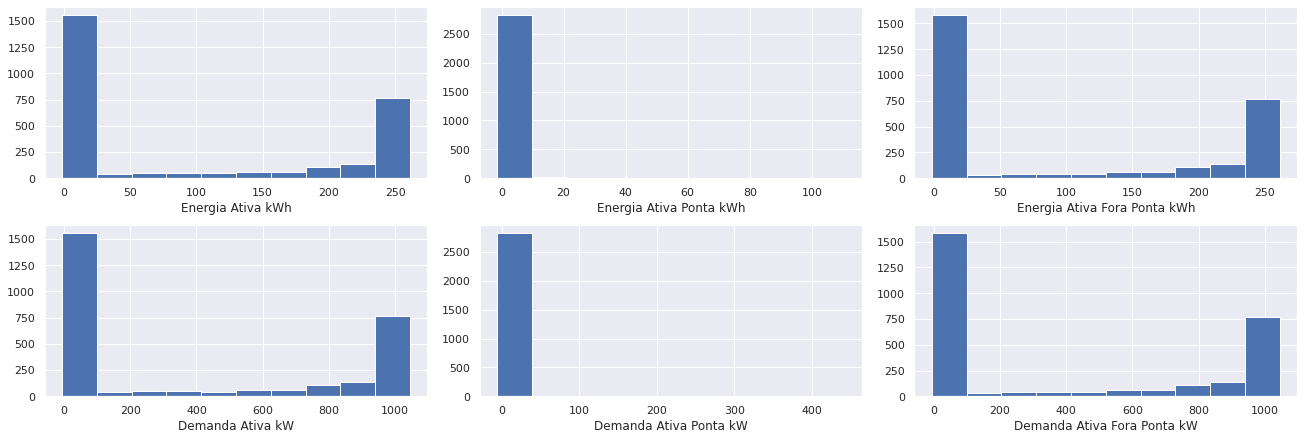

In [132]:
# Recria os gráficos da diagonal acima
rows = 2; columns = 3

Xs = df.drop(['Instante'], axis = 1).columns 

fig, axs = plt.subplots(rows, columns,  figsize=(18, 6), constrained_layout=True)

count = 0
for i in range(rows):
    for j in range(columns):
        axs[i][j].hist(df[Xs[count]])
        axs[i][j].set_xlabel(Xs[count])
        
        count += 1

In [190]:
# olhar como a energia ativa oscila ao longo do dia

df['Hora'] = df.Instante.dt.time

In [134]:
df.head()

,Instante,Energia Ativa kWh,Energia Ativa Ponta kWh,Energia Ativa Fora Ponta kWh,Demanda Ativa kW,Demanda Ativa Ponta kW,Demanda Ativa Fora Ponta kW,Hora
0,2021-09-01 00:00:00,-1.26,0.0,-1.26,-5.04,0.0,-5.04,00:00:00
1,2021-09-01 00:15:00,-1.26,0.0,-1.26,-5.04,0.0,-5.04,00:15:00
2,2021-09-01 00:30:00,-1.05,0.0,-1.05,-4.20,0.0,-4.20,00:30:00
3,2021-09-01 00:45:00,-1.26,0.0,-1.26,-5.04,0.0,-5.04,00:45:00
4,2021-09-01 01:00:00,-1.26,0.0,-1.26,-5.04,0.0,-5.04,01:00:00


In [135]:
df_aux = df.groupby(['Hora'])

In [136]:
df_aux.sum()

,Energia Ativa kWh,Energia Ativa Ponta kWh,Energia Ativa Fora Ponta kWh,Demanda Ativa kW,Demanda Ativa Ponta kW,Demanda Ativa Fora Ponta kW
Hora,,,,,,
00:00:00,-37.38,0.0,-37.38,-149.52,0.0,-149.52
00:15:00,-37.38,0.0,-37.38,-149.52,0.0,-149.52
00:30:00,-37.17,0.0,-37.17,-148.68,0.0,-148.68
00:45:00,-37.38,0.0,-37.38,-149.52,0.0,-149.52
01:00:00,-37.17,0.0,-37.17,-148.68,0.0,-148.68
...,...,...,...,...,...,...
22:45:00,-37.38,0.0,-37.38,-149.52,0.0,-149.52
23:00:00,-38.43,0.0,-38.43,-153.72,0.0,-153.72
23:15:00,-37.38,0.0,-37.38,-149.52,0.0,-149.52


In [137]:
# dataframe com a soma dos valores agregados pela hora
df_aux_soma = df_aux.sum()

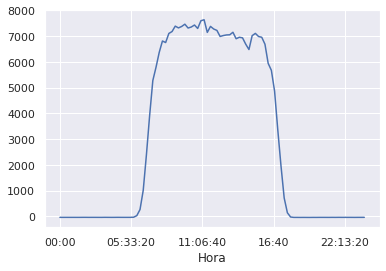

In [138]:
df_aux_soma['Energia Ativa kWh'].plot()

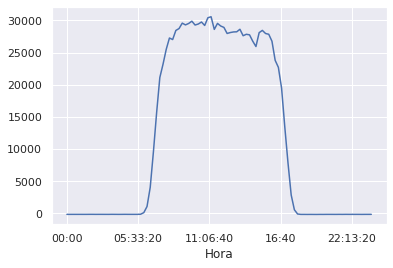

In [139]:
df_aux_soma['Demanda Ativa kW'].plot()

In [140]:
# cria uma coluna falando se o horario em questao é de ponta

hour_type = []

for value in df_aux_soma['Energia Ativa Ponta kWh']:
  if value != 0.:
    hour_type.append('S')
  else:
    hour_type.append('N')

df_aux_soma['Hora_Pico'] = hour_type

In [141]:
df_aux_soma[df_aux_soma['Hora_Pico'] == 'S']

,Energia Ativa kWh,Energia Ativa Ponta kWh,Energia Ativa Fora Ponta kWh,Demanda Ativa kW,Demanda Ativa Ponta kW,Demanda Ativa Fora Ponta kW,Hora_Pico
Hora,,,,,,,
17:15:00,1966.65,1321.74,644.91,7866.60,5286.96,2579.64,S
17:30:00,715.26,454.44,260.82,2861.04,1817.76,1043.28,S
17:45:00,139.86,96.60,43.26,559.44,386.40,173.04,S
18:00:00,-24.15,-17.01,-7.14,-96.60,-68.04,-28.56,S
18:15:00,-38.64,-26.88,-11.76,-154.56,-107.52,-47.04,S
18:30:00,-38.64,-27.30,-11.34,-154.56,-109.20,-45.36,S
18:45:00,-39.69,-28.14,-11.55,-158.76,-112.56,-46.20,S
19:00:00,-38.85,-27.09,-11.76,-155.40,-108.36,-47.04,S
19:15:00,-39.69,-27.51,-12.18,-158.76,-110.04,-48.72,S


Via essa tabela podemos visualizar que o chamado horário de Ponta é definido com sendo de 17:15:00 até 20:00:00

# Modelagem

Antes de modelarmos de fato nosso conjunto de dados devemos preparar os dados para a validação do modelo.

Primeiramente, vamos remover as colunas de Ponta e Fora Ponta, acreditando que o comportamento delas é muito bem caracterizado pela nossa coluna categórica "Hora_Pico". 

No entanto, para que possamos usar a coluna "Hora_Pico" adequadamente será necessário que usemos de _dummy variables_, por se tratar de uma variável categórica.

Além disso, devemos separar os dias de 1 a 25 como treinamento, enquanto os dias 26 até dia 30 estarão no conjunto de teste.

In [195]:
# renomeia algumas colunas para facilitar o manuseio futuro
df = df.rename(columns= {'Energia Ativa kWh': 'Energia', 'Demanda Ativa kW': 'Demanda'})

In [254]:
df_train = df[df.Instante < pd.to_datetime('2021-09-26')] 
df_test = df[df.Instante > pd.to_datetime('2021-09-26')]

In [207]:
def data_ajust(df):
  '''Funcao que reproduz os passos feitos anteriormente'''

  df_aux_soma = df.groupby(['Hora']).sum()

  hour_type = []

  for value in df_aux_soma['Energia Ativa Ponta kWh']:
    if value != 0.:
      hour_type.append('S')
    else:
      hour_type.append('N')

  df_aux_soma['Hora_Pico'] = hour_type

  # dummy variables
  dummies = pd.get_dummies(df_aux_soma['Hora_Pico'], prefix='Pico')
  df_aux_soma = pd.concat([df_aux_soma, dummies], axis=1)

  return df_aux_soma.drop(['Energia Ativa Ponta kWh', 'Energia Ativa Fora Ponta kWh', 
                           'Demanda Ativa Ponta kW', 'Demanda Ativa Fora Ponta kW', 'Hora_Pico'], 
                          axis=1)

In [255]:
df_train = data_ajust(df_train)
df_test = data_ajust(df_test)

In [256]:
df_train['Sec'] = 15*60*np.arange(len(df_train.index))

In [257]:
df_test.reset_index(inplace=True)
df_train.reset_index(inplace=True)

In [260]:
df_train.head()

,Hora,Energia,Demanda,Pico_N,Pico_S,Sec
0,00:00:00,-31.08,-124.32,1,0,0
1,00:15:00,-31.08,-124.32,1,0,900
2,00:30:00,-31.08,-124.32,1,0,1800
3,00:45:00,-30.87,-123.48,1,0,2700
4,01:00:00,-31.08,-124.32,1,0,3600


Agora podemos dar continuidade com a produção do modelo. Uma primeira proposta pode ser a análise de Regressão.

In [262]:
# regressao com o pacote statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

In [268]:
regression_model = 'Energia ~ Sec + Pico_S'

lm_model = smf.ols(regression_model, df_train).fit()

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(lm_model.resid, lm_model.model.exog)

print(f'\n F p-value Teste Breusch-Pagan de Heterocedasticidade: {test[-1]}')

#test Shapiro-Francia for normality
shapiro_stat, shapiro_p_value = stats.shapiro(lm_model.resid)
    
print(f'\n p-value Teste Shapiro-Francia de Normalidade dos Resíduos: {shapiro_p_value}')
print("")

print(lm_model.summary())


 F p-value Teste Breusch-Pagan de Heterocedasticidade: 9.853499873967213e-18

 p-value Teste Shapiro-Francia de Normalidade dos Resíduos: 1.2100302981821187e-08

                            OLS Regression Results                            
Dep. Variable:                Energia   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     5.679
Date:                Wed, 11 May 2022   Prob (F-statistic):            0.00471
Time:                        20:39:20   Log-Likelihood:                -894.05
No. Observations:                  96   AIC:                             1794.
Df Residuals:                      93   BIC:                             1802.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

Primeiramente, pelo teste F (0.00471) vemos que pelo menos um dos coeficientes angulares é estatisticamente diferente de zero. Podemos avaliar a significância de cada  através do teste T. Note que pelos p-values do teste T, apenas os coeficientes relacionados ao Pico e o intercepto são estatisticamente significantes.

Além disso, o diagnóstico dos resíduos permite-nos concluir que o modelo linear é válido nessa situação. Afinal, pelo teste de Breusch-Pagan podemos verificar a homocedasticidade dos dados assim como a aderência à normalidade dos resíduos pelo teste Shapiro-Francia.

Apesar disso, o modelo não é capaz de capturar um fator significativo da variância, como podemos verificar pelo valor do $R^2$.

Dito isso, o modelo é capaz de mostrar a de fato significância da caracterização dos horários de Ponta e Pico na produção de energia da usina, mesmo sendo incapaz de inferir os valores de produção minimamente bem. 